## Compute α，β


In [1]:
import torch, math, os
from pathlib import Path
from tqdm import tqdm

EPS = 1e-5

def calc_mean_std(pt_list):
    total_sum, total_sq, total_n = 0.0, 0.0, 0
    for f in tqdm(pt_list, desc="scanning", ncols=70):
        X, _ = torch.load(f, map_location='cpu', weights_only=True)  # X: (N,128,128)
        X = X.float()
        total_sum += X.sum().item()
        total_sq  += (X ** 2).sum().item()
        total_n   += X.numel()
    mu  = total_sum / total_n
    var = total_sq / total_n - mu ** 2
    std = math.sqrt(max(var, 0.0))
    return mu, std


root = "../../cached_scd_tim/2022_c_64_512sample_hamming"   
pt_files = sorted([f"{root}/2022_batch_{i:02d}.pt" for i in range(1, 29)])

train_files = pt_files[:10] + pt_files[-10:]   # 01–10 & 19–28
val_files   = pt_files[10:14]                  # 11–14
test_files  = pt_files[14:18]                  # 15–18


for tag, flist in [("TRAIN", train_files),
                   ("VAL  ", val_files),
                   ("TEST ", test_files)]:
    mu, std = calc_mean_std(flist)
    alpha   = 1.0 / (std + EPS)
    beta    = -mu * alpha
    print(f"[{tag}]  mean={mu:.6g}  std={std:.6g}  "
          f"α={alpha:.6g}  β={beta:.6g}")

import torch, math, os, csv
from pathlib import Path
from tqdm import tqdm

EPS = 1e-5

def alpha_beta_for_file(pt_path: str):
    
    X, _ = torch.load(pt_path, map_location="cpu", weights_only=True)  # X:(N,128,128)
    X = X.float()
    mu  = X.mean().item()
    std = X.std(unbiased=False).item()      # population std
    alpha = 1.0 / (std + EPS)
    beta  = -mu * alpha
    return mu, std, alpha, beta

root = "../../cached_scd_tim/2022_c_64_512sample_hamming"
pt_files = sorted([f"{root}/2022_batch_{i:02d}.pt" for i in range(1, 29)])

print("file,   mean,      std,        alpha,       beta")
for f in tqdm(pt_files, desc="per-file α/β"):
    mu, std, a, b = alpha_beta_for_file(f)
    print(f"{Path(f).name}, {mu:.6g}, {std:.6g}, {a:.6g}, {b:.6g}")

for tag, flist in [("TRAIN", train_files)]:
    mu, std = calc_mean_std(flist)
    alpha_train   = 1.0 / (std + EPS)
    beta_train    = -mu * alpha
    print(f"[{tag}]  mean={mu:.6g}  std={std:.6g}  "
          f"α={alpha:.6g}  β={beta:.6g}")


ALPHA = alpha_train      # 1 / (std_train + 1e-5)
BETA  = beta_train        # -mean_train * ALPHA


scanning: 100%|███████████████████████| 20/20 [00:00<00:00, 25.09it/s]


[TRAIN]  mean=4295.14  std=14429.3  α=6.93034e-05  β=-0.297668


scanning: 100%|█████████████████████████| 4/4 [00:00<00:00, 26.72it/s]


[VAL  ]  mean=4258.27  std=14284.5  α=7.00059e-05  β=-0.298104


scanning: 100%|█████████████████████████| 4/4 [00:00<00:00, 26.85it/s]


[TEST ]  mean=4280.03  std=14425.2  α=6.93232e-05  β=-0.296705
file,   mean,      std,        alpha,       beta


per-file α/β:   0%|          | 0/28 [00:00<?, ?it/s]

2022_batch_01.pt, 4093.09, 14121.9, 7.08121e-05, -0.289841


per-file α/β:  11%|█         | 3/28 [00:00<00:00, 29.74it/s]

2022_batch_02.pt, 4677.42, 15457.6, 6.46929e-05, -0.302596
2022_batch_03.pt, 4209.98, 14110.1, 7.08714e-05, -0.298367
2022_batch_04.pt, 4099.58, 13298.3, 7.51978e-05, -0.308279
2022_batch_05.pt, 4160.33, 14470.6, 6.91056e-05, -0.287502


per-file α/β:  25%|██▌       | 7/28 [00:00<00:00, 29.88it/s]

2022_batch_06.pt, 4662.43, 15452.6, 6.47141e-05, -0.301725
2022_batch_07.pt, 4245.91, 14162.9, 7.06069e-05, -0.29979


per-file α/β:  36%|███▌      | 10/28 [00:00<00:00, 29.86it/s]

2022_batch_08.pt, 4036.47, 13126.1, 7.61838e-05, -0.307513
2022_batch_09.pt, 4190.58, 14581.5, 6.85803e-05, -0.287391
2022_batch_10.pt, 4632.37, 15371.2, 6.50567e-05, -0.301367
2022_batch_11.pt, 4165.24, 13868.5, 7.21059e-05, -0.300338


per-file α/β:  46%|████▋     | 13/28 [00:00<00:00, 29.89it/s]

2022_batch_12.pt, 4072.68, 13271.6, 7.53486e-05, -0.306871
2022_batch_13.pt, 4184.38, 14623, 6.83853e-05, -0.286151


per-file α/β:  57%|█████▋    | 16/28 [00:00<00:00, 29.90it/s]

2022_batch_14.pt, 4610.79, 15287.6, 6.54123e-05, -0.301602
2022_batch_15.pt, 4151.6, 13854.3, 7.21796e-05, -0.299661
2022_batch_16.pt, 4180.08, 13622.2, 7.34093e-05, -0.306857
2022_batch_17.pt, 4265.58, 15061.6, 6.63939e-05, -0.283209


per-file α/β:  68%|██████▊   | 19/28 [00:00<00:00, 29.84it/s]

2022_batch_18.pt, 4522.87, 15096.3, 6.62413e-05, -0.299601
2022_batch_19.pt, 4192.76, 14169.8, 7.05728e-05, -0.295894


per-file α/β:  79%|███████▊  | 22/28 [00:00<00:00, 29.74it/s]

2022_batch_20.pt, 4244.66, 13765.1, 7.26477e-05, -0.308365
2022_batch_21.pt, 4234.7, 15009.7, 6.66235e-05, -0.282131
2022_batch_22.pt, 4562.91, 15208.6, 6.57524e-05, -0.300022
2022_batch_23.pt, 4215.54, 14297.5, 6.99423e-05, -0.294845


per-file α/β:  89%|████████▉ | 25/28 [00:00<00:00, 29.78it/s]

2022_batch_24.pt, 4231.87, 13633.1, 7.33508e-05, -0.310411
2022_batch_25.pt, 4235.05, 14939.4, 6.69372e-05, -0.283483


per-file α/β: 100%|██████████| 28/28 [00:00<00:00, 29.81it/s]


2022_batch_26.pt, 4583.8, 15249.2, 6.55771e-05, -0.300592
2022_batch_27.pt, 4221.13, 14273.7, 7.00588e-05, -0.295727
2022_batch_28.pt, 4172.21, 13507.8, 7.40314e-05, -0.308875


scanning: 100%|███████████████████████| 20/20 [00:00<00:00, 26.23it/s]

[TRAIN]  mean=4295.14  std=14429.3  α=6.93232e-05  β=-0.296705


In [ ]:
import os, random, numpy as np, math, gc, time, torch
from tqdm.auto import tqdm
from torch.utils.data import Dataset, DataLoader


import os, random, numpy as np, torch
from pathlib import Path
from torch.utils.data import Dataset
from tqdm.auto import tqdm

torch.manual_seed(0);  np.random.seed(0);  random.seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device =", device)

ALPHA = alpha_train      # 1 / (std_train + 1e-5)
BETA  = beta_train        # -mean_train * ALPHA


class SCDTensorDataset(Dataset):

    def __init__(self, pt_files):
        self.meta, self.cache, off = [], {}, 0
        for f in pt_files:
            n = torch.load(f, map_location="cpu")[0].shape[0]
            self.meta.append((f, off, off+n));  off += n
        self.N = off

    def __len__(self): return self.N

    def __getitem__(self, idx):
        for f, beg, end in self.meta:
            if beg <= idx < end:
                if f not in self.cache:
                    self.cache[f] = torch.load(f, map_location="cpu",weights_only=True)
                X, y = self.cache[f]
                img = X[idx - beg].float()          
                img = img * ALPHA + BETA       
                img = img.unsqueeze(0)          
                return img, y[idx - beg].long().squeeze()


import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    def __init__(self, in_c, out_c, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_c, out_c, 3, stride, 1, bias=False)
        self.bn1   = nn.BatchNorm2d(out_c)
        self.conv2 = nn.Conv2d(out_c, out_c, 3, 1, 1, bias=False)
        self.bn2   = nn.BatchNorm2d(out_c)

        self.down = nn.Identity()
        if stride != 1 or in_c != out_c:
            self.down = nn.Sequential(
                nn.Conv2d(in_c, out_c, 1, stride, bias=False),
                nn.BatchNorm2d(out_c))

    def forward(self, x):
        y = F.relu(self.bn1(self.conv1(x)))
        y = self.bn2(self.conv2(y))
        return F.relu(y + self.down(x))

def make_layer(in_c, out_c, blocks, stride):
    layers = [BasicBlock(in_c, out_c, stride)]
    layers += [BasicBlock(out_c, out_c) for _ in range(blocks-1)]
    return nn.Sequential(*layers)

class SCDResNet64(nn.Module):
    def __init__(self, n_cls=8):
        super().__init__()
        # Stem：1×64×64 → 64×32×32
        self.stem = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=7, stride=1, padding=3, bias=False),  
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)                   
        )      
        self.layer1 = make_layer( 64,  64, blocks=3, stride=1)  # 64×32×32
        self.layer2 = make_layer( 64, 128, blocks=3, stride=2)  # 128×16×16
        self.layer3 = make_layer(128, 192, blocks=3, stride=2)  # 192×8×8
        self.layer4 = make_layer(192, 256, blocks=3, stride=2)  # 256×4×4

        self.head = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(256, n_cls)
        )

    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x);  x = self.layer2(x)
        x = self.layer3(x);  x = self.layer4(x)
        return self.head(x)


net = SCDResNet64().to(device)
print(f"Total params: {sum(p.numel() for p in net.parameters())/1e6:.2f} M")


from torch.utils.data import Subset
pt_files = sorted([f"../../cached_scd_tim/2022_c_64_512sample_hamming/2022_batch_{i:02d}.pt" for i in range(1, 29)])  # 01-28
train_files = pt_files[:10] + pt_files[-10:]   
val_files   = pt_files[10:14]                  
test_files  = pt_files[14:18]                  

train_ds = SCDTensorDataset(train_files)
val_ds   = SCDTensorDataset(val_files)
test_ds  = SCDTensorDataset(test_files)

print(f"Shuffled split → train {len(train_ds):,} | val {len(val_ds):,} | test {len(test_ds):,}")


num_workers = 4
batch_size  = 32
train_ld = DataLoader(train_ds, batch_size, shuffle=True,
                      num_workers=num_workers, pin_memory=(device == "cuda"))
val_ld   = DataLoader(val_ds,   batch_size, shuffle=False,
                      num_workers=num_workers, pin_memory=(device == "cuda"))
test_ld  = DataLoader(test_ds,  batch_size, shuffle=False,
                      num_workers=num_workers, pin_memory=(device == "cuda"))


net = SCDResNet64(n_cls=8).to(device)
for m in net.modules():                           
    if isinstance(m, nn.BatchNorm2d):
        m.momentum = 0.1          

optim = torch.optim.SGD(net.parameters(), lr=0.1,
                        momentum=0.9, weight_decay=1e-4)


warm_epochs   = 5          
total_epochs  = 500        
eta_min       = 1e-8      

warmup = torch.optim.lr_scheduler.LinearLR(
            optim, start_factor=0.1, end_factor=1.0, total_iters=warm_epochs)

cosine = torch.optim.lr_scheduler.CosineAnnealingLR(
            optim, T_max=total_epochs - warm_epochs, eta_min=eta_min)


scheduler = torch.optim.lr_scheduler.SequentialLR(
               optim, schedulers=[warmup, cosine],
               milestones=[warm_epochs])        

crit = nn.CrossEntropyLoss(label_smoothing=0.05)   
def run_epoch(loader, training=True):
    net.train(training)
    tot=loss_sum=acc=0
    for xb, yb in loader:
        xb,yb = xb.to(device), yb.to(device)
        with torch.set_grad_enabled(training):
            out  = net(xb)
            loss = crit(out,yb)
            if training:
                optim.zero_grad(); loss.backward()
                torch.nn.utils.clip_grad_norm_(net.parameters(), 1.0)  
                optim.step()
        pred = out.argmax(1)
        bsz  = yb.size(0)
        tot  += bsz
        loss_sum += loss.item()*bsz
        acc  += (pred==yb).sum().item()
    return loss_sum/tot, acc/tot


best = 0
epochs=total_epochs

for ep in range(1, epochs+1):
    tr_l, tr_a = run_epoch(train_ld, True)
    vl_l, vl_a = run_epoch(val_ld, False)
    ts_l, ts_a = run_epoch(test_ld, False)  

    print(f"E{ep:02d}  train {tr_a*100:5.2f}% | loss {tr_l:.4f}   "
          f"val {vl_a*100:5.2f}% | loss {vl_l:.4f}   "
          f"test {ts_a*100:5.2f}% | loss {ts_l:.4f}")

    scheduler.step()       

    if vl_a > best:
        best = vl_a
        torch.save(net.state_dict(), "best_scd_resnet.pth")

    print("current lr =", optim.param_groups[0]['lr'])

print("Best val acc:", best)

# evaluate best on test
net.load_state_dict(torch.load("best_scd_resnet.pth"))
net.eval()
test_loss, test_acc = run_epoch(test_ld, training=False)
print(f"Final Test Accuracy: {test_acc*100:.2f}%")



In [3]:

import os, random, time, gc, math, numpy as np, torch
from pathlib import Path
from tqdm.auto import tqdm
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

device = "cuda" if torch.cuda.is_available() else "cpu"
print("device =", device)

ALPHA = alpha_train      # 1 / (std_train + 1e-5)
BETA  = beta_train        # -mean_train * ALPHA

class SCDTensorDataset(Dataset):
    def __init__(self, pt_files):
        self.meta, self.cache, off = [], {}, 0
        for f in pt_files:
            n = torch.load(f, map_location="cpu")[0].shape[0]
            self.meta.append((f, off, off+n)); off += n
        self.N = off

    def __len__(self): return self.N

    def __getitem__(self, idx):
        for f, beg, end in self.meta:
            if beg <= idx < end:
                if f not in self.cache:
                    self.cache[f] = torch.load(f, map_location="cpu", weights_only=True)
                X, y = self.cache[f]
                img  = X[idx - beg].float()
                
                img = img * ALPHA + BETA        
                img = img.unsqueeze(0)          
                
                return img, y[idx - beg].long().squeeze()

import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    def __init__(self, in_c, out_c, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_c, out_c, 3, stride, 1, bias=False)
        self.bn1   = nn.BatchNorm2d(out_c)
        self.conv2 = nn.Conv2d(out_c, out_c, 3, 1, 1, bias=False)
        self.bn2   = nn.BatchNorm2d(out_c)
        self.down  = nn.Identity()
        if stride != 1 or in_c != out_c:
            self.down = nn.Sequential(
                nn.Conv2d(in_c, out_c, 1, stride, bias=False),
                nn.BatchNorm2d(out_c))

    def forward(self, x):
        y = F.relu(self.bn1(self.conv1(x)))
        y = self.bn2(self.conv2(y))
        return F.relu(y + self.down(x))

def make_layer(in_c, out_c, blocks, stride):
    layers = [BasicBlock(in_c, out_c, stride)]
    layers += [BasicBlock(out_c, out_c) for _ in range(blocks-1)]
    return nn.Sequential(*layers)

class SCDResNet64(nn.Module):
    def __init__(self, n_cls=8):
        super().__init__()
        self.stem   = nn.Sequential(
            nn.Conv2d(1, 64, 7, 1, 3, bias=False),
            nn.BatchNorm2d(64), nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2, 1))
        self.layer1 = make_layer( 64,  64, 3, 1)
        self.layer2 = make_layer( 64, 128, 3, 2)
        self.layer3 = make_layer(128, 192, 3, 2)
        self.layer4 = make_layer(192, 256, 3, 2)
        self.head   = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(256, n_cls))

    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x); x = self.layer2(x)
        x = self.layer3(x); x = self.layer4(x)
        return self.head(x)


class SCDResNet64_Student(nn.Module):
    def __init__(self, n_cls=8):
        super().__init__()
        ch = [24, 24, 48, 72, 96]          
        self.stem = nn.Sequential(
            nn.Conv2d(1, ch[0], 7, 1, 3, bias=False),
            nn.BatchNorm2d(ch[0]), nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2, 1))
        self.layer1 = make_layer(ch[0], ch[1], 2, 1)
        self.layer2 = make_layer(ch[1], ch[2], 2, 2)
        self.layer3 = make_layer(ch[2], ch[3], 2, 2)
        self.layer4 = make_layer(ch[3], ch[4], 2, 2)
        self.head = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(0.4),
            nn.Linear(ch[4], n_cls))
    def forward(self,x):
        x=self.stem(x)
        x=self.layer1(x); x=self.layer2(x)
        x=self.layer3(x); x=self.layer4(x)
        return self.head(x)

pt_files = sorted([f"../../cached_scd_tim/2022_c_64_512sample_hamming/2022_batch_{i:02d}.pt"
                   for i in range(1, 29)])       # 01-28
train_files = pt_files[:10] + pt_files[-10:]     # 01-10 & 19-28
val_files   = pt_files[10:14]                    # 11-14
test_files  = pt_files[14:18]                    # 15-18

train_ds = SCDTensorDataset(train_files)
val_ds   = SCDTensorDataset(val_files)
test_ds  = SCDTensorDataset(test_files)
print(f"train {len(train_ds):,} | val {len(val_ds):,} | test {len(test_ds):,}")

loader_cfg = dict(batch_size=32, num_workers=4,
                  pin_memory=(device=='cuda'))
train_ld = DataLoader(train_ds, shuffle=True,  **loader_cfg)
val_ld   = DataLoader(val_ds,   shuffle=False, **loader_cfg)
test_ld  = DataLoader(test_ds,  shuffle=False, **loader_cfg)

def kd_loss(student_logits, teacher_logits, labels,
            T=4.0, alpha=0.7):
    kd = F.kl_div(
        F.log_softmax(student_logits/T, dim=1),
        F.softmax(teacher_logits/T, dim=1),
        reduction='batchmean') * (T*T)
    ce = F.cross_entropy(student_logits, labels)
    return alpha*kd + (1-alpha)*ce

@torch.no_grad()
def eval_model(model, loader):
    model.eval()
    tot = loss_sum = acc = 0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        loss = F.cross_entropy(out, yb)
        pred = out.argmax(1)
        bsz  = yb.size(0)
        tot += bsz
        loss_sum += loss.item()*bsz
        acc += (pred==yb).sum().item()
    return loss_sum/tot, acc/tot

teacher = SCDResNet64(); teacher.load_state_dict(
    torch.load("best_scd_resnet.pth", map_location=device))
teacher.eval().to(device)

student = SCDResNet64_Student().to(device)
print(f"Student params: {sum(p.numel() for p in student.parameters())/1e6:.2f} M")

opt = torch.optim.SGD(student.parameters(), lr=0.05,
                      momentum=0.9, weight_decay=2e-4)
warm_epochs   = 5
total_epochs  = 500
eta_min       = 1e-10                      
warmup = torch.optim.lr_scheduler.LinearLR(
            opt, start_factor=0.1, end_factor=1.0, total_iters=warm_epochs)
cosine = torch.optim.lr_scheduler.CosineAnnealingLR(
            opt, T_max=total_epochs - warm_epochs, eta_min=eta_min)

sched = torch.optim.lr_scheduler.SequentialLR(
            opt, schedulers=[warmup, cosine], milestones=[warm_epochs])
best_val = 0.0
for epoch in range(1, total_epochs + 1):
    student.train()
    tr_tot = tr_loss_sum = tr_correct = 0
    for xb, yb in train_ld:
        xb, yb = xb.to(device), yb.to(device)
        with torch.no_grad():
            t_out = teacher(xb)
        s_out  = student(xb)
        loss   = kd_loss(s_out, t_out, yb, T=4, alpha=0.7)

        opt.zero_grad(); loss.backward()
        torch.nn.utils.clip_grad_norm_(student.parameters(), 1.0)
        opt.step()

        bsz = yb.size(0)
        tr_tot       += bsz
        tr_loss_sum  += loss.item() * bsz
        tr_correct   += (s_out.argmax(1) == yb).sum().item()

    sched.step()           

    train_loss = tr_loss_sum / tr_tot
    train_acc  = tr_correct  / tr_tot

    val_loss,  val_acc  = eval_model(student, val_ld)
    test_loss, test_acc = eval_model(student, test_ld)

    print(f"E{epoch:03d} | "
          f"train {train_acc*100:5.2f}% / {train_loss:.4f}   "
          f"val {val_acc*100:5.2f}% / {val_loss:.4f}   "
          f"test {test_acc*100:5.2f}% / {test_loss:.4f}   "
          f"lr {sched.get_last_lr()[0]:.3e}")

    if val_acc > best_val:
        best_val = val_acc
        torch.save(student.state_dict(), "best_student.pth")

print("KD finished. Best val acc:", best_val*100)


student.load_state_dict(torch.load("best_student.pth"))
_, test_acc = eval_model(student, test_ld)
print(f"Student Test Accuracy: {test_acc*100:.2f}%")

xb, _ = next(iter(test_ld))
img = xb[0:1].to(device)
torch.cuda.synchronize() if device=='cuda' else None
t0 = time.time()
_ = student(img)
torch.cuda.synchronize() if device=='cuda' else None
t1 = time.time()
print(f"⏱️ Student inference (1 img): {(t1-t0)*1000:.2f} ms")


device = cuda


/tmp/ipykernel_597497/1654851405.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  n = torch.load(f, map_location="cpu")[0].shape[0]


train 80,000 | val 16,000 | test 16,000
Student params: 0.59 M


/tmp/ipykernel_597497/1654851405.py:154: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load("best_scd_resnet.pth", map_location=device))


E001 | train 16.85% / 2.3121   val 17.89% / 2.0142   test 17.91% / 2.0148   lr 1.400e-02
E002 | train 17.49% / 2.2927   val 17.83% / 2.0170   test 17.82% / 2.0174   lr 2.300e-02
E003 | train 17.73% / 2.2805   val 18.18% / 1.9971   test 18.03% / 1.9973   lr 3.200e-02
E004 | train 17.94% / 2.2753   val 18.19% / 1.9910   test 18.11% / 1.9906   lr 4.100e-02
E005 | train 17.99% / 2.2692   val 18.41% / 1.9934   test 18.42% / 1.9964   lr 5.000e-02
E006 | train 18.39% / 2.2605   val 19.28% / 1.9771   test 19.12% / 1.9779   lr 5.000e-02
E007 | train 18.77% / 2.2466   val 18.95% / 1.9635   test 18.73% / 1.9642   lr 5.000e-02
E008 | train 19.11% / 2.2360   val 20.01% / 1.9519   test 19.79% / 1.9545   lr 5.000e-02
E009 | train 19.69% / 2.2246   val 19.83% / 1.9470   test 19.61% / 1.9477   lr 4.999e-02
E010 | train 20.02% / 2.2116   val 19.83% / 1.9474   test 19.88% / 1.9471   lr 4.999e-02
E011 | train 20.44% / 2.2054   val 21.31% / 1.9315   test 20.95% / 1.9314   lr 4.998e-02
E012 | train 20.99% /

/tmp/ipykernel_597497/1654851405.py:213: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  student.load_state_dict(torch.load("best_student.pth"))


Student Test Accuracy: 94.52%
⏱️ Student inference (1 img): 11.16 ms


## Confusion Matrix

/tmp/ipykernel_597497/903676083.py:112: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  student.load_state_dict(torch.load('best_student.pth',    map_location=device))
/tmp/ip

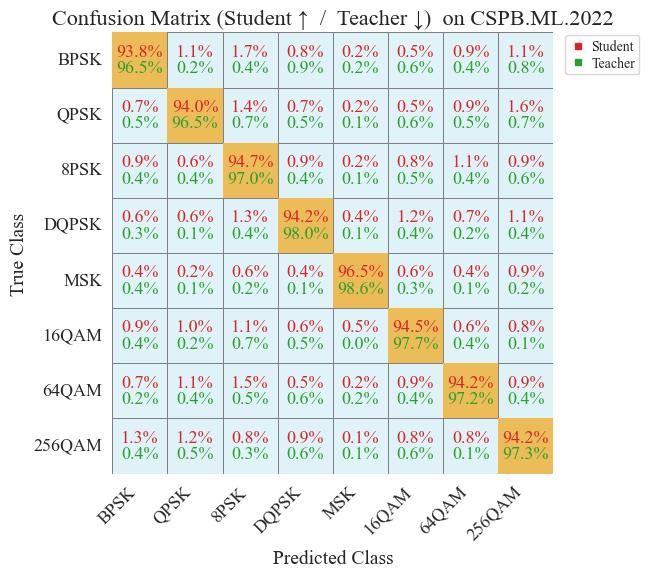

In [ ]:
import numpy as np
import torch, seaborn as sns, matplotlib.pyplot as plt, matplotlib as mpl
from sklearn.metrics import confusion_matrix
import torch.nn as nn, torch.nn.functional as F
import matplotlib as mpl
from matplotlib import font_manager
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from matplotlib.colors import LinearSegmentedColormap

device  = "cuda" if torch.cuda.is_available() else "cpu"
classes = ['BPSK','QPSK','8PSK','DQPSK','MSK','16QAM','64QAM','256QAM']
n_cls   = len(classes)

sns.set_style('white')
tnr_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
font_manager.fontManager.addfont(tnr_path)
tnr_name = font_manager.FontProperties(fname=tnr_path).get_name()
        
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif']  = [tnr_name]         
mpl.rcParams.update({
    'font.size'      : 14,       
    'axes.titlesize' : 16,
    'axes.labelsize' : 15,
})

cmap_blue = sns.color_palette('Blues', as_cmap=True)


class BasicBlock(nn.Module):
    def __init__(self, in_c, out_c, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_c, out_c, 3, stride, 1, bias=False)
        self.bn1   = nn.BatchNorm2d(out_c)
        self.conv2 = nn.Conv2d(out_c, out_c, 3, 1, 1, bias=False)
        self.bn2   = nn.BatchNorm2d(out_c)
        self.down  = nn.Identity()
        if stride != 1 or in_c != out_c:
            self.down = nn.Sequential(
                nn.Conv2d(in_c, out_c, 1, stride, bias=False),
                nn.BatchNorm2d(out_c))
    def forward(self, x):
        y = F.relu(self.bn1(self.conv1(x)))
        y = self.bn2(self.conv2(y))
        return F.relu(y + self.down(x))

def make_layer(in_c, out_c, blocks, stride):
    layers = [BasicBlock(in_c, out_c, stride)]
    layers += [BasicBlock(out_c, out_c) for _ in range(blocks-1)]
    return nn.Sequential(*layers)

class SCDResNet64(nn.Module):
    def __init__(self, n_cls=8):
        super().__init__()
        self.stem   = nn.Sequential(
            nn.Conv2d(1, 64, 7, 1, 3, bias=False),
            nn.BatchNorm2d(64), nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2, 1))
        self.layer1 = make_layer( 64,  64, 3, 1)
        self.layer2 = make_layer( 64, 128, 3, 2)
        self.layer3 = make_layer(128, 192, 3, 2)
        self.layer4 = make_layer(192, 256, 3, 2)
        self.head   = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(256, n_cls))

    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x); x = self.layer2(x)
        x = self.layer3(x); x = self.layer4(x)
        return self.head(x)


class SCDResNet64_Student(nn.Module):
    def __init__(self, n_cls=8):
        super().__init__()
        ch = [24, 24, 48, 72, 96]          
        self.stem = nn.Sequential(
            nn.Conv2d(1, ch[0], 7, 1, 3, bias=False),
            nn.BatchNorm2d(ch[0]), nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2, 1))
        self.layer1 = make_layer(ch[0], ch[1], 2, 1)
        self.layer2 = make_layer(ch[1], ch[2], 2, 2)
        self.layer3 = make_layer(ch[2], ch[3], 2, 2)
        self.layer4 = make_layer(ch[3], ch[4], 2, 2)
        self.head = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(0.4),
            nn.Linear(ch[4], n_cls))
    def forward(self,x):
        x=self.stem(x)
        x=self.layer1(x); x=self.layer2(x)
        x=self.layer3(x); x=self.layer4(x)
        return self.head(x)

student = SCDResNet64_Student(n_cls).to(device)
teacher = SCDResNet64(n_cls).to(device)

student.load_state_dict(torch.load('best_student.pth',    map_location=device))
teacher.load_state_dict(torch.load('best_scd_resnet.pth', map_location=device))

@torch.no_grad()
def get_preds(model, loader):
    model.eval()
    p, y = [], []
    for xb, yb in loader:               # test_ld 为你的 DataLoader
        p.append(model(xb.to(device)).argmax(1).cpu())
        y.append(yb.cpu())
    return torch.cat(p).numpy(), torch.cat(y).numpy()

y_pred_s, y_true = get_preds(student, test_ld)
y_pred_t, _      = get_preds(teacher, test_ld)


def cm_percent(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=range(n_cls))
    return cm / cm.sum(1, keepdims=True) * 100, cm

cm_s_perc, cm_s = cm_percent(y_true, y_pred_s)
cm_t_perc, cm_t = cm_percent(y_true, y_pred_t)


annot = np.empty_like(cm_s_perc, dtype=object)
for i in range(n_cls):
    for j in range(n_cls):
        if cm_s[i,j] == cm_t[i,j] == 0:
            annot[i,j] = ''
        else:
            annot[i,j] = f'{cm_s_perc[i,j]:.1f}%\n{cm_t_perc[i,j]:.1f}%'

cmap_student = LinearSegmentedColormap.from_list(
    "custom_blue", ["#e0f3f8", "#abd9e9", "#74add1", "#4575b4"]
)


fig, ax = plt.subplots(figsize=(7,6))


sns.heatmap(cm_s_perc, ax=ax, cmap=cmap_student, cbar=False,
            annot=False, linewidths=.4, linecolor='grey',
            vmin=0, vmax=100, mask=(cm_s==0), square=True)


for i in range(n_cls):
    rect = plt.Rectangle((i, i), 1, 1,
                         facecolor='#FFC34E',
                         edgecolor='none',
                         alpha=0.9,
                         zorder=3)
    ax.add_patch(rect)


for i in range(n_cls):
    for j in range(n_cls):
        if cm_s[i, j] == cm_t[i, j] == 0:
            continue
        ax.text(j + 0.5, i + 0.35, f'{cm_s_perc[i, j]:.1f}%',
                ha='center', va='center', color='#d62728', fontsize=13)
        ax.text(j + 0.5, i + 0.65, f'{cm_t_perc[i, j]:.1f}%',
                ha='center', va='center', color='#2ca02c', fontsize=13)


ax.set_xticklabels(classes, rotation=45, ha='right', fontsize=13)
ax.set_yticklabels(classes, rotation=0,  fontsize=13)
ax.set_xlabel('Predicted Class', fontsize=14)
ax.set_ylabel('True Class',      fontsize=14)
plt.title('Confusion Matrix (Student ↑  /  Teacher ↓)  on CSPB.ML.2022', fontsize=16)


student_legend = mlines.Line2D([], [], color='#d62728', marker='s', linestyle='None',
                               markersize=5, label='Student')
teacher_legend = mlines.Line2D([], [], color='#2ca02c', marker='s', linestyle='None',
                               markersize=5, label='Teacher')
ax.legend(
    handles=[student_legend, teacher_legend],
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0.2,
    handletextpad=0.4,
    labelspacing=0.2,
    handlelength=1.2,
    borderpad=0.3,
    fontsize=10
)

plt.tight_layout()
plt.show()